![digitizing_team](digitizing_team.png)


DigiNsure Inc. is an innovative insurance company focused on enhancing the efficiency of processing claims and customer service interactions. Their newest initiative is digitizing all historical insurance claim documents, which includes improving the labeling of some IDs scanned from paper documents and identifying them as primary or secondary IDs.

To help them in their effort, you'll be using multi-modal learning to train an Optical Character Recognition (OCR) model. To improve the classification, the model will use **images** of the scanned documents as input and their **insurance type** (home, life, auto, health, or other). Integrating different data modalities (such as image and text) enables the model to perform better in complex scenarios, helping to capture more nuanced information. The **labels** that the model will be trained to identify are of two types: a primary and a secondary ID, for each image-insurance type pair.

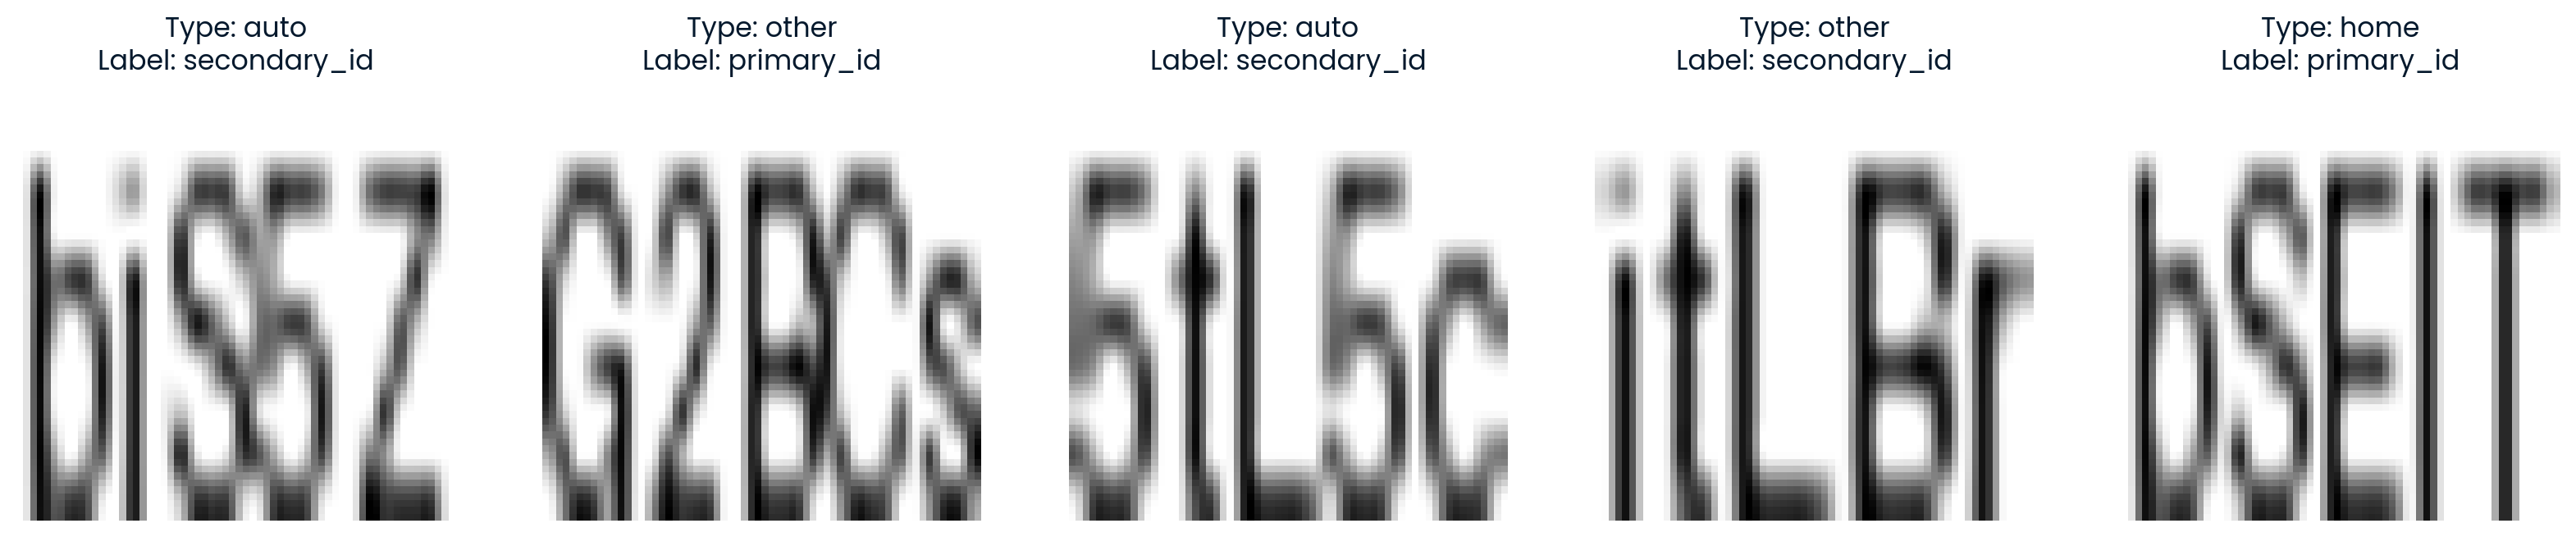

In [158]:
# Import the necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from project_utils import ProjectDataset
import pickle 
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

# Load the data
dataset = pickle.load(open('ocr_insurance_dataset.pkl', 'rb'))

# Define a function to visualize codes with their corresponding types and labels 
def show_dataset_images(dataset, num_images=5):
    fig, axes = plt.subplots(1, min(num_images, len(dataset)), figsize=(20, 4))
    for ax, idx in zip(axes, np.random.choice(len(dataset), min(num_images, len(dataset)), False)):
        img, lbl = dataset[idx]
        ax.imshow((img[0].numpy() * 255).astype(np.uint8).reshape(64,64), cmap='gray'), ax.axis('off')
        ax.set_title(f"Type: {list(dataset.type_mapping.keys())[img[1].tolist().index(1)]}\nLabel: {list(dataset.label_mapping.keys())[list(dataset.label_mapping.values()).index(lbl)]}")
    plt.show()

# Inspect 5 codes images from the dataset
show_dataset_images(dataset)

In [159]:
# Start coding here 
# Define the OCRModel class

In [160]:
class OCRModel(nn.Module):
    def __init__(self):
        super(OCRModel, self).__init__()
        self.image_layer = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, padding=1),
            nn.MaxPool2d(kernel_size=2),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(16*32*32, 128)
        )
        self.type_layer = nn.Sequential(
            nn.Linear(5, 10),
            nn.ReLU(),
        )
        self.classifier = nn.Sequential(
            nn.Linear(128 + 10, 64),
            nn.ReLU(),
            nn.Linear(64, 2)
        )

    def forward(self, x_image, x_type):
        x_image = self.image_layer(x_image)
        x_type = self.type_layer(x_type)
        x = torch.cat((x_image, x_type), dim=1)
        return self.classifier(x)

In [161]:
# Define optimizer and loss functions
model = OCRModel()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [162]:
# Define training dataloader
train_dataloader = DataLoader(dataset, batch_size=10, shuffle=True)
# for batch, (X, y) in enumerate(train_dataloader):
#     print(f"Batch: {batch+1}")
#     print(f"X shape: {X}")
#     print(f"y shape: {y}")

In [163]:
# Define training loop
num_epochs = 10
for epoch in range(num_epochs):
    for (img, types), labels in train_dataloader:
        optimizer.zero_grad()
        outputs = model(img, types)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1}, Loss: {loss.item()}")

Epoch 1, Loss: 0.6893694400787354
Epoch 2, Loss: 0.6754945516586304
Epoch 3, Loss: 0.5103102922439575
Epoch 4, Loss: 0.6774916052818298
Epoch 5, Loss: 0.47529083490371704
Epoch 6, Loss: 0.4222647547721863
Epoch 7, Loss: 0.18080368638038635
Epoch 8, Loss: 0.6119556427001953
Epoch 9, Loss: 0.10476911067962646
Epoch 10, Loss: 0.16957703232765198
